In [1]:
import cv2
import matplotlib.pyplot as plt

from deepface import DeepFace

In [2]:
cap = cv2.imread('adultes1.jpeg')

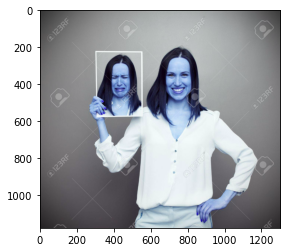

In [3]:
plt.imshow(cap)

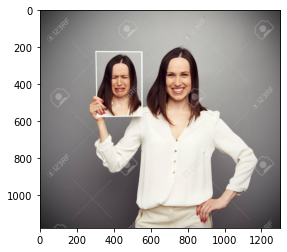

In [4]:
plt.imshow(cv2.cvtColor(cap, cv2.COLOR_BGR2RGB))

In [5]:
emo_detect = DeepFace.analyze(img_path = cap, 
        actions = ['emotion']
)

1/1 [==============================] - 0s 136ms/step


In [6]:
emo_detect

{'emotion': {'angry': 0.008718320168554783,
  'disgust': 0.00030035421332286205,
  'fear': 0.006854518869658932,
  'happy': 99.78251457214355,
  'sad': 0.0003333084805490216,
  'surprise': 0.0006996430329309078,
  'neutral': 0.20058478694409132},
 'dominant_emotion': 'happy',
 'region': {'x': 649, 'y': 280, 'w': 192, 'h': 192}}

In [7]:
type(emo_detect)

dict

In [8]:
# access directly dominant_emotion from dictionary
emo_detect['dominant_emotion']

'happy'

## detecting face(s) w/ haarCascade
* haarCascade created by Viola Jones, OpenSource

In [9]:
from deepface import DeepFace
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [10]:
# gray is easier/fasterto work with, just 1 color layer, 
gray = cv2.cvtColor(cap, cv2.COLOR_BGR2GRAY)
# MultiScale is detecting multiple faces as well as different distances to cam
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

In [11]:
print(faces.shape)
# --> 2 faces detected

(2, 4)


# drawing rectangel around faces and emotion status

In [12]:
for (x, y, w, h) in faces:
    cv2.rectangle(cap, (x, y), (x+w, y+h), (95, 158, 160), 25)
# rgb color values, width of line
    emo_detect = DeepFace.analyze(img_path = cap, actions = ['emotion'])
    text = cv2.FONT_HERSHEY_DUPLEX 
# positioning:
    cv2.putText(
        cap,
        emo_detect['dominant_emotion'],
        (x+5, y-20),
#         (0, 200),
        text, 4,
        (75,0,130),
        12,
        cv2.LINE_4) ;
# --> now working for >1 face and showing each one's emotion status :)  

1/1 [==============================] - 0s 15ms/step


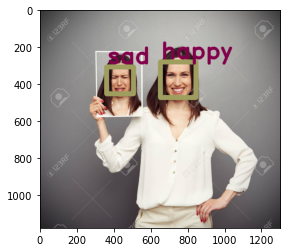

In [13]:
plt.imshow(cv2.cvtColor(cap, cv2.COLOR_BGR2RGB))

# FER via REAL TIME VID

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
import cv2
cap = cv2.VideoCapture(0)

In [ ]:
ret, frame = cap.read()
# if frame is None:
#     raise ValueError('unable to get a frame!')

In [ ]:
# print(ret)

In [ ]:
# # kontrolltest
# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# faces = faceCascade.detectMultiScale(gray,1.1,4)
# print(faces.shape)

In [ ]:
# infinite loop
while True:
    ret, frame = cap.read()
    if frame is None:
        raise ValueError('unable to get a frame!')
        
    
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (95, 158, 160), 15)
        result = DeepFace.analyze(img_path = frame, actions = ['emotion'], enforce_detection=False)
        text = cv2.FONT_HERSHEY_DUPLEX 
        cv2.putText(
            frame,
            result['dominant_emotion'],
            (x+5, y-20),
            text, 2,
            (75,0,130),
            4,
            cv2.LINE_4) 
    
        cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('p'):
            break
        
cap.release()
cv2.destroyAllWindows()

------------------------------------------------------------------------------------------

## !! NEW BUG !!
* bei einer Person mehrere frames mit emo status uebereinander
* aber code oben fkt :)

In [ ]:
# infinite loop, stop with 'p'
while True:
    # haarcascade
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    emo_detect = DeepFace.analyze(img_path = frame, actions = ['emotion'], enforce_detection=False)
    # for all faces
    
    for (x, y, w, h) in faces: 
        
        # rectangle around faces
        cv2.rectangle(frame, (x, y), (x+w, y+h), (95, 158, 160), 15)
        
        # emo status for each face
#         emo_detect = DeepFace.analyze(img_path = frame, actions = ['emotion'], enforce_detection=False)
    
        text = cv2.FONT_HERSHEY_DUPLEX 
        cv2.putText(
            frame,
            emo_detect['dominant_emotion'],
            (x+5, y-20),
            text, 2,
            (75,0,130),
            4,
            cv2.LINE_4) 
    
        cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('p'):
            break
        
cap.release()
cv2.destroyAllWindows()